Hypothesis : Every year a lot more action movies get released than comedy movies.
(Assuming the dataset contains names of all movies released)


In [2]:
#imprt all your libraries
import pandas as pd
import re
import matplotlib.pyplot as plt



In [3]:
#read in all your data
data_folder = r'C:\Personal\Tredence 2\movielensEDA\data'
moviesData = pd.read_csv(data_folder+r'\movies.csv')
ratingsData = pd.read_csv(data_folder+r'\ratings.csv')
tagsData = pd.read_csv(data_folder+r'\tags.csv')
#remove non complete rows
moviesData.dropna(inplace=True)
moviesData.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#split genres
moviesData.dtypes


movieId     int64
title      object
genres     object
dtype: object

In [5]:
#get year from movie title 
moviesData['year']=moviesData['title'].str.extract('(\(\d+\))')


In [7]:
moviesData['Comedy_flg']=0
moviesData['Action_flg']=0


In [8]:
#tag movies as action or comedy based on the genres field.
#if genres field has comedy then movie is tagged as comedy
#if genres field has action then movie is tagged as action
#if genres field has action and comedy movie is tagged as action and comedy
for row in range(0,moviesData.shape[0]):
    genres = [gen.upper() for gen in moviesData['genres'].iloc[row].split("|")]
    if 'COMEDY' in genres:
        moviesData['Comedy_flg'].iloc[row]=1
    if 'ACTION' in genres:
        moviesData['Action_flg'].iloc[row]=1
        

c:\python27\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [9]:
# GET COUNTS OF COMEDY MOVIES BY YEAR
Comedy_Movies = moviesData[moviesData['Comedy_flg']==1]
comedyYearlyCount = Comedy_Movies[['year','movieId']].groupby('year',as_index=False).count()
comedyYearlyCount=comedyYearlyCount.rename(columns={'movieId':'NUM_COMEDY'})
#comedyYearlyCount.head(10)


In [10]:
# GET COUNTS OF ACTION MOVIES BY YEAR
Action_Movies = moviesData[moviesData['Action_flg']==1]
ActionYearlyCount = Action_Movies[['year','movieId']].groupby('year',as_index=False).count()
ActionYearlyCount=ActionYearlyCount.rename(columns={'movieId':'NUM_ACTION'})
#ActionYearlyCount.head(10)

In [22]:
# after getting counts of movies by comedy and action genre released during years 
#plot a line graph to see if the hypothesis is true
finalDF = pd.merge(comedyYearlyCount,ActionYearlyCount,left_on=['year'],right_on=['year'])
yearlbl = finalDF['year']
numCom = finalDF['NUM_COMEDY']
numAct = finalDF['NUM_ACTION']


[1916, 1926, 1936, 1946, 1956, 1966, 1976, 1986, 1996, 2006, 2016]


In [39]:
lblNmsRng = range(1916,2018,5)
lblNms = []
for lbl in lblNmsRng:
    lblNms.append(lbl)
    for i in range(0,3):
        lblNms.append(" ")


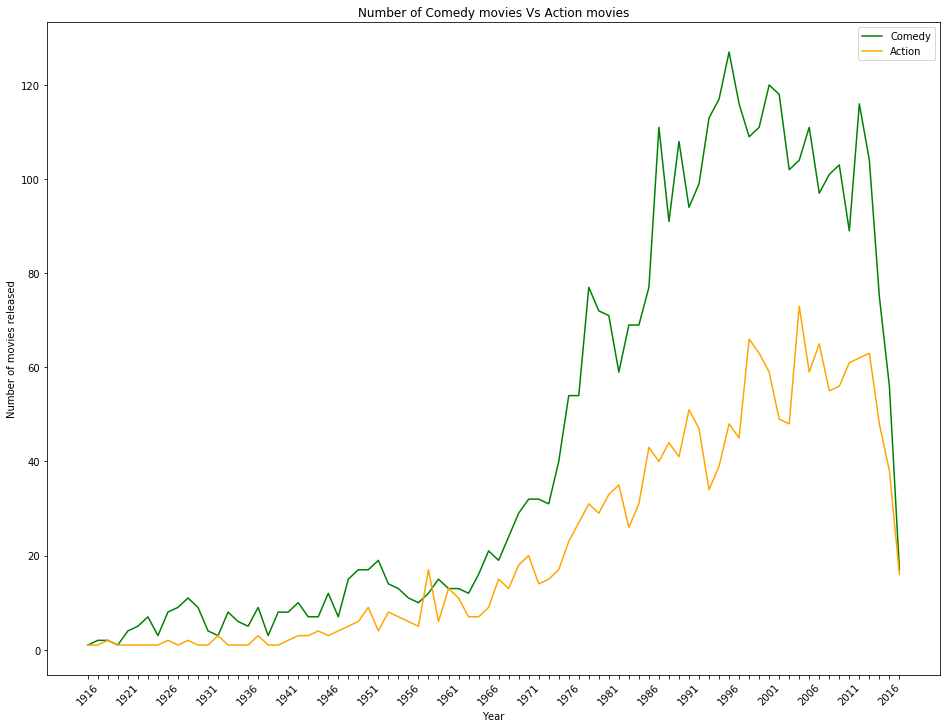

In [41]:
fig= plt.figure(figsize=(16,12))
plt.plot(yearlbl, numCom, color='g',label="Comedy")
plt.plot(yearlbl, numAct, color='orange',label="Action")
plt.xlabel('Year')
plt.ylabel('Number of movies released')
plt.title('Number of Comedy movies Vs Action movies')
plt.gca().legend(('Comedy','Action'))
plt.xticks(yearlbl,lblNms, rotation=45)
plt.show()


 The Graph shows that a lot more comedy movies are relased than action movies almost every year especially after 1975. Hence my initial hypothesis that a lot more action movies are released than comedy movies is disproved.